# plot the training data

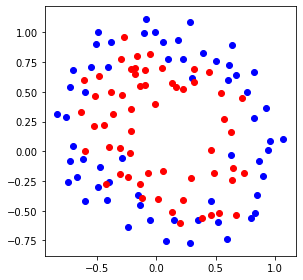

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [185]:
def g(T,x,y):
    X = np.array([x**i for i in range(10)])
    Y = np.array([y**i for i in range(10)])
    X = np.expand_dims(X, axis = 1)
    Y = np.expand_dims(Y, axis = 0)
    return np.sum(T * np.dot(X,Y))

def sig(z):
    return 1 / (1 + np.exp(-z))
    
    
def obj(T, X, Y, m, rambda):
    error = 0
    eps = 1e-12
    for i in range(m):
        error += (label[i] * np.log(1/(eps+sig(g(T,X[i],Y[i]))))) + ((1-label[i]) * np.log(1/(eps+1-sig(g(T,X[i],Y[i])))))
    error = error / m
    regularize = 0
    for row in range(10):
        for col in range(10):
            regularize += T[row][col] ** 2
    error += regularize * rambda /2
    return error

    
def gradient(T,X,Y,m,lr, rambda):
    nT = [[0 for i in range(10)]for j in range(10)]
    for row in range(10):
        temp = []
        for col in range(10):
            val = 0
            for i in range(m):
                val += (sig(g(T,X[i],Y[i])) - label[i]) * (X[i]**row) * (Y[i]**col) + rambda*T[row][col]
            nT[row][col] = T[row][col] - lr / m * val
    return nT
    
    
def acc(T,X,Y,m):
    score = 0
    for i in range(m):
        if g(T,X[i],Y[i]) >= 0 and label[i] == 1:
            score += 1
        elif g(T,X[i],Y[i]) < 0 and label[i] == 0:
            score += 1
    return score / m

In [188]:
m = len(label)
lr = 0.01
itermax = 10000
itercount = 0
loss = []
accuracy = []
T = []
for row in range(10):
    temp = []
    for col in range(10):
        temp.append(np.random.randn())
    T.append(temp)
T_init = T

while True:
    
    if itercount > itermax:
        break
    loss.append(obj(T,pointX, pointY, m, 1/4))
    accuracy.append(acc(T,pointX,pointY,m))
    T = gradient(T,pointX,pointY,m,lr, 1/4)
    itercount += 1
    
    if itercount > 2 and abs(loss[-1]-loss[-2]) < 0.000001: #check convergence
        break

In [189]:
over_itercount = 0
over_loss = []
over_accuracy = []
over_T = T_init

while True:
    
    if over_itercount > itermax:
        break
    over_loss.append(obj(over_T,pointX, pointY, m, 0))
    over_accuracy.append(acc(over_T,pointX,pointY,m))
    over_T = gradient(over_T,pointX,pointY,m,lr, 0)
    over_itercount += 1
    
    if over_itercount > 2 and abs(over_loss[-1]-over_loss[-2]) < 0.000001: #check convergence
        break

In [190]:
under_itercount = 0
under_loss = []
under_accuracy = []
under_T = T_init

while True:
    
    if under_itercount > itermax:
        break
    under_loss.append(obj(under_T,pointX, pointY, m, 1))
    under_accuracy.append(acc(under_T,pointX,pointY,m))
    under_T = gradient(under_T,pointX,pointY,m,lr, 1)
    under_itercount += 1
    
    if under_itercount > 2 and abs(under_loss[-1]-under_loss[-2]) < 0.000001: #check convergence
        break

# Plot the train error

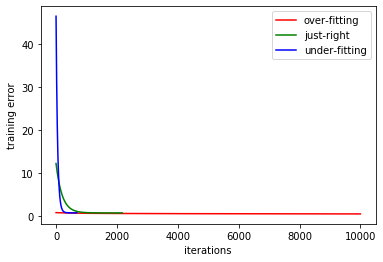

In [191]:
step = [i for i in range(over_itercount)]
plt.plot(step, over_loss ,  label = 'over-fitting', c = 'r')
step = [i for i in range(itercount)]
plt.plot(step, loss ,  label = 'just-right', c = 'g')
step = [i for i in range(under_itercount)]
plt.plot(step, under_loss ,  label = 'under-fitting', c = 'b')
plt.xlabel("iterations")
plt.ylabel("training error")
plt.legend()
plt.show()

# Display the values of the chosen regularization parameters

$\color{red}{\lambda_1: 0 }$  $\color{green}{\lambda_2: 1/4 }$ $\color{blue}{\lambda_3: 1 }$  



# plot the training accuracy

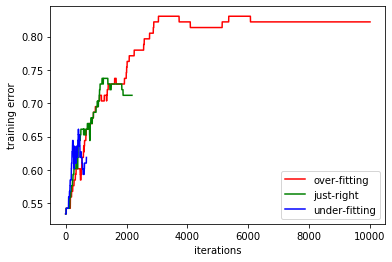

In [192]:
step = [i for i in range(over_itercount)]
plt.plot(step, over_accuracy ,  label = 'over-fitting', c = 'r')
step = [i for i in range(itercount)]
plt.plot(step, accuracy,  label = 'just-right', c = 'g')
step = [i for i in range(under_itercount)]
plt.plot(step, under_accuracy,  label = 'under-fitting', c = 'b')
plt.xlabel("iterations")
plt.ylabel("training error")
plt.legend()
plt.show()

# final training accuracy

over-fitting accuracy: $\color{red}{82.20338983050848\%}$  
just-right accuracy: $\color{green}{71.1864406779661 \%}$  
under-fitting accuracy: $\color{blue}{61.86440677966102\%}$  

In [193]:
print("final over-fitting accuracy: ", over_accuracy[-1]*100, "%")

final over-fitting accuracy:  82.20338983050848 %


In [194]:
print("final just-right accuracy: ", accuracy[-1]*100, "%")

final just-right accuracy:  71.1864406779661 %


In [195]:
print("final under-fitting accuracy: ", under_accuracy[-1]*100, "%")

final under-fitting accuracy:  61.86440677966102 %


# plot the optimal classifier 

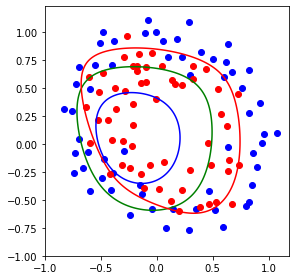

In [197]:
def g(T, x, y):
    result = 0
    for row in range(10):
        for col in range(10):
            result += T[row][col] * (x**row) * (y**col)
    return result

plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')

delta = 0.01
x = np.arange(-1.0,1.0,delta)
y = np.arange(-1.0,1.0,delta)
X,Y = np.meshgrid(x,y)
Z1 = g(T,X,Y)
Z2 = g(over_T,X,Y)
Z3 = g(under_T, X,Y)

plt.contour(X,Y,Z1, levels =[0], colors = 'g')
plt.contour(X,Y,Z2, levels =[0], colors = 'r')
plt.contour(X,Y,Z3, levels =[0], colors = 'b')
plt.tight_layout()
plt.gca().set_aspect('equal')
plt.show()